
# We Rate Dogs

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.
I will do a wrangling, analyzing and visualization of the tweet data of the WeRateDogs.

In [1]:
# Import modules
import json
import os
import time
import pandas as pd
import numpy as np
import requests
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

In [2]:
# Twitter api
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

# Function to get twitter connection
def twitter_connection(consumer_key, consumer_secret, access_token, access_secret):
    if os.path.isfile("data/tweet_json.txt"):
        return "File already exists"
    else:
        auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_token, access_secret)

        api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
    
    return api

In [3]:
api = twitter_connection(consumer_key, consumer_secret, access_token, access_secret)

In [4]:
# Downloading data from the url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# Request the url
r = requests.get(url)

In [5]:
# Store the downloaded data
folder_name = 'data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

with open('data/image_predictions.tsv', 'wb') as file:
    file.write(r.content)

In [6]:
# Read the data into a data frame
archive_df = pd.read_csv("data/twitter-archive-enhanced.csv")
predictions_df = pd.read_csv("data/image_predictions.tsv", sep="\t")

In [7]:
# Getting tweet ids
archive_tweet_id = list(archive_df.tweet_id)
prediction_tweet_id = list(predictions_df.tweet_id)

In [8]:
len(archive_tweet_id)

2356

In [9]:
len(prediction_tweet_id)

2075

In [10]:
tweet_ids = archive_tweet_id + prediction_tweet_id

In [11]:
len(tweet_ids)

4431

In [12]:
# Keeping unique tweet ids
tweet_ids = list(set(tweet_ids))

In [13]:
len(tweet_ids)

2356

In [14]:
# Extracting tweet details from the API and storing it in a .txt file
# Collecting id which are still there
working_ids = []

# Tweet id of tweet which are deleted
removed_ids = []

def get_tweet_details():
    if os.path.isfile("data/tweet_json.txt"):
        print("File exists, no need to extract again")
        value = 0
    else:
        # Count the progress
        count = 0

        # Opening a file to write on
        with open('data/tweet_json.txt', 'w') as file:
            start = time.time()
            for tweet_id in tweet_ids:
                count = count + 1
                # Writing the data to a file - line by line
                try:
                    status = api.get_status(tweet_id, tweet_mode = 'extended')
                    file.write(json.dumps(status._json))
                    file.write('\n')
                    working_ids.append(tweet_id)
                    print("{}) Successful id: {}".format(count, tweet_id))
                # Handeling exception
                except:
                    removed_ids.append(tweet_id)
                    print("{}) Failed id: {}".format(count, tweet_id))
            end = time.time()
            print("Time taken: {}".format(end - start))
        value = 1
    return value

In [15]:
value = get_tweet_details()

File exists, no need to extract again


In [16]:
if value == 1:
    print(len(working_ids))
    print(len(removed_ids))
else:
    print("File is alread present so this is not needed")

File is alread present so this is not needed


In [17]:
# To hold the tweets details
all_tweets = []

# Read the file to add the details to a list
with open("data/tweet_json.txt") as f:
    for line in f:
        # Converting the string into a dictionary
        data = json.loads(line) 
        all_tweets.append(data)

# Creating a data frame with all the tweet details
all_tweet_df = pd.DataFrame(all_tweets)

**Now we have three data frames**
- all_tweet_df - Extracted from the API
- archive_df - Got from Udacity
- predictions_df- Downloaded from the url

In [18]:
# Making a copy of the data frames
archive_clean = archive_df.copy()
all_tweet_clean = all_tweet_df.copy()
predictions_clean = predictions_df.copy()

In [19]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [20]:
all_tweet_clean.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24837,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,NaN,NaN,NaN,NaN,4136,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38490,False,This is Phineas. He's a mystical boy. Only eve...,None,...,NaN,NaN,NaN,NaN,8478,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",40021,False,This is Franklin. He would like you to stop ca...,None,...,NaN,NaN,NaN,NaN,9333,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41859,False,This is Darla. She commenced a snooze mid meal...,None,...,NaN,NaN,NaN,NaN,8596,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",11751,False,Meet Jax. He enjoys ice cream so much he gets ...,None,...,NaN,NaN,NaN,NaN,2057,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [21]:
predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [23]:
all_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2342 non-null object
display_text_range               2342 non-null object
entities                         2342 non-null object
extended_entities                2067 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null bool
full_text                        2342 non-null object
geo                              0 non-null object
id                               2342 non-null int64
id_str                           2342 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [24]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
archive_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [26]:
all_tweet_clean.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2342.000000,2.342000e+03,7.800000e+01,7.800000e+01,2.600000e+01,2342.000000
mean,8041.837319,7.422646e+17,7.455079e+17,2.014171e+16,8.113972e+17,2980.563194
std,12365.108172,6.837466e+16,7.582492e+16,1.252797e+17,6.295843e+16,4990.429809
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.721083e+17,0.000000
25%,1394.250000,6.783509e+17,6.757419e+17,3.086374e+08,7.761338e+17,599.250000
50%,3508.500000,7.186224e+17,7.038708e+17,4.196984e+09,8.281173e+17,1395.000000
75%,9879.750000,7.987010e+17,8.257804e+17,4.196984e+09,8.637581e+17,3478.000000
max,162303.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,84178.000000


In [27]:
predictions_clean.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
archive_clean[archive_clean.retweeted_status_id.notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


In [29]:
archive_clean[archive_clean.rating_denominator != 10].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None


In [30]:
archive_clean[archive_clean.rating_numerator < 10].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None


In [31]:
archive_clean[archive_clean.name == "a"].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None


In [32]:
archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [33]:
archive_clean.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [34]:
archive_clean.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

### Quality 

`archive_clean` table

- Timestamp should be converted to datatime
- Retweeted tweets which are 181 of all the tweets
- In in_reply_tweets doesn't have ratings in all of them
- The html tags doesn't make sense. A better way for values in source would be the name - Iphone, web etc
- Ratings (Numerator) only has intergers, it didn't included the decimal ratings.
- Rating on (Denominator) doesn't include value less than 10 which is not correct.
- tweet_id 810984652412424192 doesn't have any rating in it
- Names are sometimes preposition (a, an, the .. ). For tweet_id 666063827256086533 the name is **the**
- Dog stages are not correct
- Keep the same name of columns in both the all_tweet_clean and archive_clean
- Extract rating from text into a new columns

`predictions_clean` **table**

- p1, p2, p3 have sometimes "-" and other times "_" between words
- columns p1, p2 and p3 values have both lower and upper case

`all_tweet_clean` **table**

- Remove unwanted columns

`twitter_archive_master_clean` **table**

- Remove unwanted columns from twitter_archive master
- Tweet id 716439118184652801 has wrong numerator and denominator rating

### Tidiness

- Merge data frames to get retweets and favorite counts
- Dog stage are in different columns

## Cleaning

##### `archive_clean`: **Timestamp should be converted to datatime**

**Define:**

Convert the time-date from string to datetime

**Code:**

In [35]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean.timestamp)

**Test**

In [36]:
archive_clean.timestamp.describe()

count                    2356
unique                   2356
top       2016-09-12 15:10:21
freq                        1
first     2015-11-15 22:32:08
last      2017-08-01 16:23:56
Name: timestamp, dtype: object

##### `archive_clean`: **Remove retweeted tweets which are 181 of all the tweets**

**Define:**

Removing retweeted data. Keeping only direct tweets.

**Code:**

In [37]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

**Test**

In [38]:
archive_clean[archive_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### `archive_clean`: **Remove in reply to user id**

**Define:**

Not all reply tweets have rating in them. It's better to remove them.

**Code:**

In [39]:
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isnull()]

**Test**

In [40]:
archive_clean[archive_clean.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### `archive_clean`: **A better way for values in source would be the name - Iphone, web etc**

**Define:**

Remove the tags and href just keep the source name not the link

**Code:**

In [41]:
archive_clean.source = archive_clean.source.str.extract('(W\w+\sC\w+|iP\w+|V\w+|twe\w+)', expand=True)

**Test**

In [42]:
archive_clean.source.value_counts()

iPhone        1964
Vine            91
Web Client      31
tweetdeck       11
Name: source, dtype: int64

##### `archive_clean`: **Extract ratings from the text columns**

**Define:**

Extract ratings from the tweet text. Rating also includes decimal values.

**Code:**

In [43]:
archive_clean[['full_rating', 'dump']] = archive_clean.text.str.extract('((\d+.)?\d+/\d\d+)', expand = True)

**Test**

In [44]:
archive_clean.full_rating.value_counts()

12/10       486
10/10       436
11/10       413
13/10       287
9/10        153
8/10         98
7/10         51
14/10        38
5/10         33
6/10         32
3/10         19
4/10         15
2/10          9
1/10          4
80/80         1
121/110       1
9/11          1
7/11          1
60/50         1
88/80         1
420/10        1
11.26/10      1
4/20          1
9.75/10       1
44/40         1
204/170       1
11.27/10      1
13.5/10       1
45/50         1
1776/10       1
144/120       1
84/70         1
99/90         1
0/10          1
165/150       1
50/50         1
Name: full_rating, dtype: int64

##### `archive_clean`: **Fix Numerator and Denominator**

**Define:**

Include the decimal values in numerator too by spliting the full_rating column

**Code:**

In [45]:
archive_clean[['rating_numerator','rating_denominator']] = archive_clean.full_rating.str.split("/",expand=True)

**Test**

In [46]:
archive_clean.rating_numerator.value_counts()

12       486
10       436
11       413
13       287
9        154
8         98
7         52
14        38
5         33
6         32
3         19
4         16
2          9
1          4
50         1
13.5       1
165        1
45         1
11.27      1
80         1
44         1
144        1
0          1
84         1
60         1
11.26      1
88         1
1776       1
420        1
9.75       1
204        1
121        1
99         1
Name: rating_numerator, dtype: int64

In [47]:
archive_clean.rating_denominator.value_counts()

10     2081
50        3
11        2
80        2
70        1
40        1
110       1
150       1
20        1
90        1
170       1
120       1
Name: rating_denominator, dtype: int64

In [48]:
archive_clean[['full_rating', 'rating_numerator', 'rating_denominator']].head(5)

,full_rating,rating_numerator,rating_denominator
0,13/10,13,10
1,13/10,13,10
2,12/10,12,10
3,13/10,13,10
4,12/10,12,10


In [49]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2096 non-null object
rating_denominator            2096 non-null object
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
full_rating                   

In [50]:
archive_clean[archive_clean.rating_numerator.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,full_rating,dump
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",NaN,NaN,Sam,None,None,None,None,NaN,NaN


##### `archive_clean`: **tweet_id: 810984652412424192 doesn't have any rating in it**

**Define:**

Remove the observation with tweet_id as 810984652412424192.

**Code**

In [51]:
archive_clean = archive_clean[archive_clean.full_rating.notnull()]

**Test**

In [52]:
archive_clean[archive_clean.full_rating.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,full_rating,dump


##### `archive_clean`: **dog stages are not correct**

**Define:**

Extract dog stage and put it in a seperate column.

**Code**

In [53]:
data = archive_clean.text.str.lower()
archive_clean['stage'] = data.str.extract('(doggo|floofer|pupper|puppo)', expand=True)

**Test**

In [54]:
archive_clean.stage.value_counts()

pupper     250
doggo       85
puppo       30
floofer      9
Name: stage, dtype: int64

##### `archive_clean`: **Dog names have a, an, the.**

**Define:**

Removing names with a or an or the.

**Code:**

In [55]:
archive_clean['name'] = archive_clean.name.replace(['a','an','the'], None)

**Test**

In [56]:
archive_clean[archive_clean.name == 'The']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,full_rating,dump,stage


In [57]:
archive_clean[archive_clean.name == 'An']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,full_rating,dump,stage


In [58]:
archive_clean[archive_clean.name == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,full_rating,dump,stage


##### `archive_clean`, `all_tweet_clean`: **match column names**

**Define:**

Use tweet_id instead of id in all_tweet_clean

**Code:**

In [59]:
all_tweet_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

**Test**

In [60]:
all_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2342 non-null object
display_text_range               2342 non-null object
entities                         2342 non-null object
extended_entities                2067 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null bool
full_text                        2342 non-null object
geo                              0 non-null object
tweet_id                         2342 non-null int64
id_str                           2342 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

##### `all_tweet_clean`: **Drop unwanted columns**

**Define:**

Drop columns which will not be used in future analysis

**Code**

In [61]:
all_columns = list(all_tweet_clean)

In [62]:
all_columns

['contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'full_text',
 'geo',
 'tweet_id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'truncated',
 'user']

In [63]:
keep_columns = ["tweet_id","retweet_count","favorite_count"]

In [64]:
drop_columns = [x for x in all_columns if x not in keep_columns]

In [65]:
drop_columns

['contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorited',
 'full_text',
 'geo',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'retweeted',
 'retweeted_status',
 'source',
 'truncated',
 'user']

In [66]:
all_tweet_clean.drop(drop_columns, axis=1, inplace=True)

**Test**

In [67]:
all_tweet_clean.head()

,favorite_count,tweet_id,retweet_count
0,24837,891815181378084864,4136
1,38490,892420643555336193,8478
2,40021,891327558926688256,9333
3,41859,891689557279858688,8596
4,11751,890971913173991426,2057


In [68]:
all_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
favorite_count    2342 non-null int64
tweet_id          2342 non-null int64
retweet_count     2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


##### `archive_clean`, `all_tweet_clean`: **Merge both the DataFrame**

**Define:**

Left merge to get retweetcounts and favorite counts

**Code**

In [69]:
twitter_archive_master = pd.merge(archive_clean, all_tweet_clean, how='inner')

In [70]:
twitter_archive_master_clean = twitter_archive_master.copy()

**Test**

In [71]:
twitter_archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2094
Data columns (total 22 columns):
tweet_id                      2095 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2095 non-null datetime64[ns]
source                        2095 non-null object
text                          2095 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2092 non-null object
rating_numerator              2095 non-null object
rating_denominator            2095 non-null object
name                          2095 non-null object
doggo                         2095 non-null object
floofer                       2095 non-null object
pupper                        2095 non-null object
puppo                         2095 non-null object
full_rating                   

### Check for more quality issues

In [72]:
numarator_outlier = twitter_archive_master_clean.rating_numerator.value_counts()

In [73]:
numarator_outlier = dict(numarator_outlier)

In [74]:
numarator_outlier

{'12': 485,
 '10': 436,
 '11': 413,
 '13': 287,
 '9': 154,
 '8': 98,
 '7': 52,
 '14': 38,
 '5': 33,
 '6': 32,
 '3': 19,
 '4': 16,
 '2': 9,
 '1': 4,
 '50': 1,
 '13.5': 1,
 '165': 1,
 '45': 1,
 '11.27': 1,
 '80': 1,
 '44': 1,
 '144': 1,
 '0': 1,
 '84': 1,
 '60': 1,
 '11.26': 1,
 '88': 1,
 '1776': 1,
 '420': 1,
 '9.75': 1,
 '204': 1,
 '121': 1,
 '99': 1}

In [75]:
outlier = []
for key in numarator_outlier.keys():
    if numarator_outlier.get(key) <= 5:
        outlier.append(list(twitter_archive_master_clean[twitter_archive_master_clean.rating_numerator == key].tweet_id))
    else:
        continue

In [76]:
flat_outlier = []
for sublist in outlier:
    for element in sublist:
        flat_outlier.append(element)

In [77]:
# Set working directory
os.chdir(os.getcwd()+'/data')
# To check manually
twitter_archive_master_clean[twitter_archive_master_clean.tweet_id.isin(flat_outlier)].to_csv("check_numerator_value.csv")

In [78]:
twitter_archive_master_clean[(twitter_archive_master_clean.rating_numerator == '50') & (twitter_archive_master_clean.rating_denominator == '50')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,full_rating,dump,stage,favorite_count,retweet_count
983,716439118184652801,NaN,NaN,2016-04-03 01:36:11,iPhone,This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,...,Bluebert,None,None,None,None,50/50,NaN,NaN,2493,232


##### `twitter_archive_master_clean`: **Fixing the numerator and denominator rating of the tweet it 716439118184652801 and index is 983**

**Define:**

Setting the correct rating for both the numerator and denominator. The acutal rating is 11/10.

**Code**

In [79]:
twitter_archive_master_clean.full_rating.replace('50/50', '11/10', inplace=True)

In [80]:
twitter_archive_master_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_master_clean.full_rating.str.split('/', expand=True)

**Test**

In [81]:
twitter_archive_master_clean[twitter_archive_master_clean.tweet_id == 716439118184652801]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,full_rating,dump,stage,favorite_count,retweet_count
983,716439118184652801,NaN,NaN,2016-04-03 01:36:11,iPhone,This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,...,Bluebert,None,None,None,None,11/10,NaN,NaN,2493,232


##### `twitter_archive_master_clean`: **Remove unwanted columns**

**Define**

Remove columns which won't be needed in further analysis

**Code**

In [82]:
remove_col = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
              'retweeted_status_user_id','retweeted_status_timestamp','dump',
              'floofer','doggo','pupper','puppo']

In [83]:
twitter_archive_master_clean.drop(remove_col, axis=1, inplace=True)

**Test**

In [84]:
twitter_archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2094
Data columns (total 12 columns):
tweet_id              2095 non-null int64
timestamp             2095 non-null datetime64[ns]
source                2095 non-null object
text                  2095 non-null object
expanded_urls         2092 non-null object
rating_numerator      2095 non-null object
rating_denominator    2095 non-null object
name                  2095 non-null object
full_rating           2095 non-null object
stage                 374 non-null object
favorite_count        2095 non-null int64
retweet_count         2095 non-null int64
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 212.8+ KB


##### `predictions_clean`: **Variable values are not having consistent case also - and _ between words**

**Define**

Replace - and _ with space. Make lower case of all the values in p1, p2 and p3 columns

**Code**

In [85]:
predictions_clean['p1'] = predictions_clean.p1.str.replace("_"," ")
predictions_clean['p1'] = predictions_clean.p1.str.replace("-"," ")
predictions_clean['p1'] = predictions_clean.p1.str.lower()

predictions_clean['p2'] = predictions_clean.p2.str.replace("_"," ")
predictions_clean['p2'] = predictions_clean.p2.str.replace("-"," ")
predictions_clean['p2'] = predictions_clean.p2.str.lower()

predictions_clean['p3'] = predictions_clean.p3.str.replace("_"," ")
predictions_clean['p3'] = predictions_clean.p3.str.replace("-"," ")
predictions_clean['p3'] = predictions_clean.p1.str.lower()

**Test**

In [86]:
predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
814,692568918515392513,https://pbs.twimg.com/media/CZx_wV2UMAArgsJ.jpg,2,golden retriever,0.636845,True,labrador retriever,0.163362,True,golden retriever,0.045554,True
128,668274247790391296,https://pbs.twimg.com/media/CUYv4d2WUAAziXs.jpg,1,soft coated wheaten terrier,0.406374,True,lakeland terrier,0.263854,True,soft coated wheaten terrier,0.150844,True
1236,746726898085036033,https://pbs.twimg.com/media/ClzoJz7WYAELHSf.jpg,1,golden retriever,0.256505,True,labrador retriever,0.252417,True,golden retriever,0.203163,False
76,667435689202614272,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,rottweiler,0.999091,True,miniature pinscher,0.000450,True,rottweiler,0.000157,True
80,667455448082227200,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,1,tibetan terrier,0.676376,True,irish terrier,0.054933,True,tibetan terrier,0.040576,True


##### `twitter_archive_master_clean`, `predictions_clean`: **Merge both the DataFrame**

**Define:**

Left merge to get retweetcounts and favorite counts

**Code**

In [87]:
twitter_archive_master_clean = pd.merge(twitter_archive_master_clean, predictions_clean, how='inner')

**Test**

In [88]:
twitter_archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 23 columns):
tweet_id              1969 non-null int64
timestamp             1969 non-null datetime64[ns]
source                1969 non-null object
text                  1969 non-null object
expanded_urls         1969 non-null object
rating_numerator      1969 non-null object
rating_denominator    1969 non-null object
name                  1969 non-null object
full_rating           1969 non-null object
stage                 338 non-null object
favorite_count        1969 non-null int64
retweet_count         1969 non-null int64
jpg_url               1969 non-null object
img_num               1969 non-null int64
p1                    1969 non-null object
p1_conf               1969 non-null float64
p1_dog                1969 non-null bool
p2                    1969 non-null object
p2_conf               1969 non-null float64
p2_dog                1969 non-null bool
p3                    1969 non-n

**Export all Cleaned files**

In [89]:
# Export the data into csv
twitter_archive_master_clean.to_csv("twitter_archive_master.csv")
archive_clean.to_csv("archive_clean.csv")
predictions_clean.to_csv("predictions_clean.csv")
all_tweet_clean.to_csv("all_tweet_clean.csv")

## Visualization

In [90]:
%matplotlib inline

In [91]:
sns.set(style="darkgrid")

In [92]:
stopwords = set(STOPWORDS)

In [93]:
# Wordcloud on this data
data = twitter_archive_master_clean.text.str.lower()

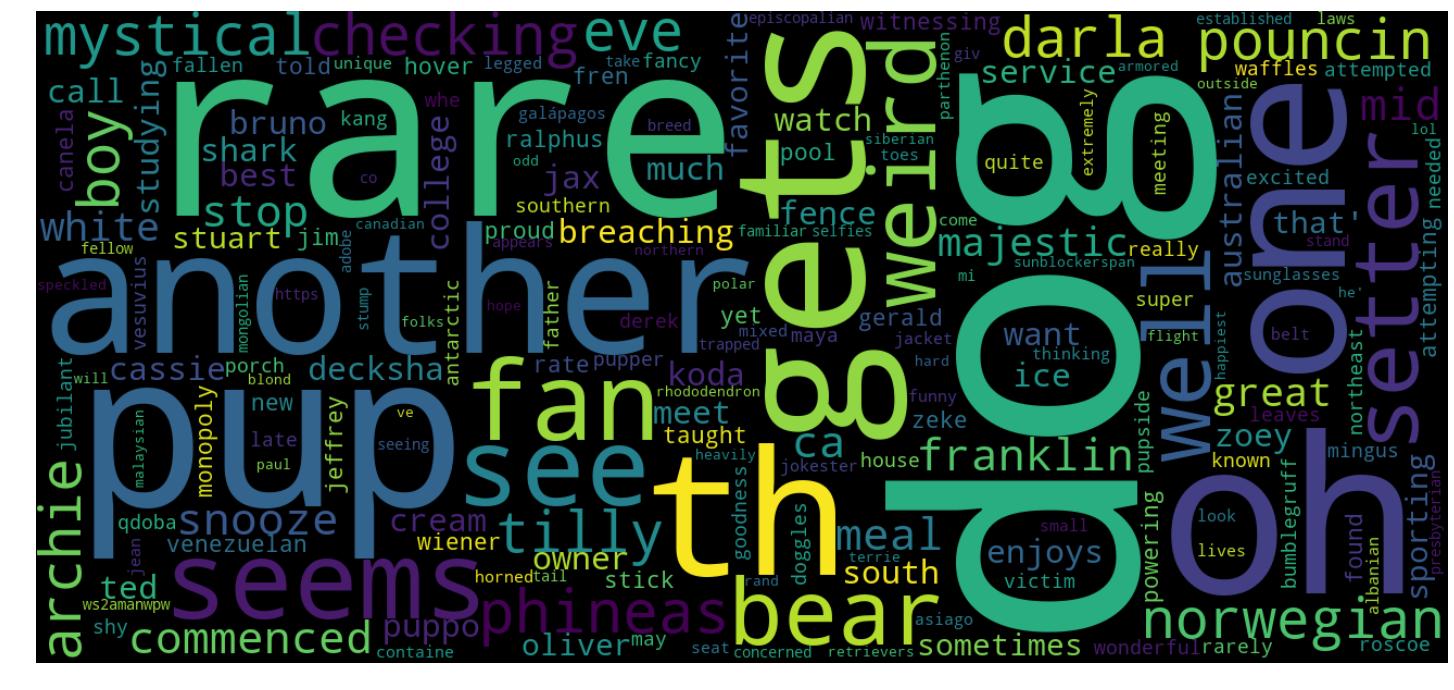

In [94]:
# Wordcloud
fig = plt.figure(figsize=(20,10))

wordcloud = WordCloud(width=1300, height=600, stopwords=stopwords).generate(str(data))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Some of the most used words are **dog**, **rare**, **pup** and **oh**

In [95]:
# Creating variables to plot

# Retweet count data
rt = twitter_archive_master_clean.retweet_count
# Favorite count data
fav = twitter_archive_master_clean.favorite_count
# Month data
month = pd.DatetimeIndex(twitter_archive_master_clean['timestamp']).month
# Year data
year = pd.DatetimeIndex(twitter_archive_master_clean['timestamp']).year

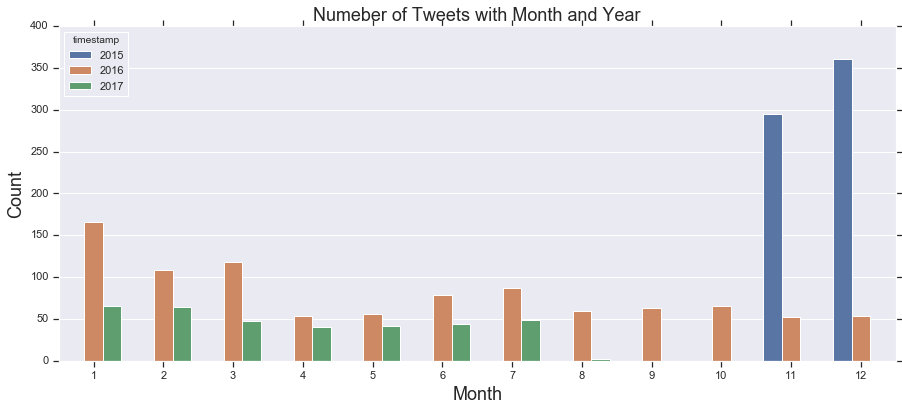

In [96]:
# Histogram of number of tweets by month and year
plt.figure(figsize=(15,6))
sns.countplot(month, hue=year)
plt.xlabel("Month", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("Numeber of Tweets with Month and Year", fontsize=18)
plt.show()

More tweets came during the end of 2015. However, the number of tweets decreased year on year.

In [97]:
# Correlation bewtween retweet and favorite counts
rt.corr(fav)

0.92762643759261032

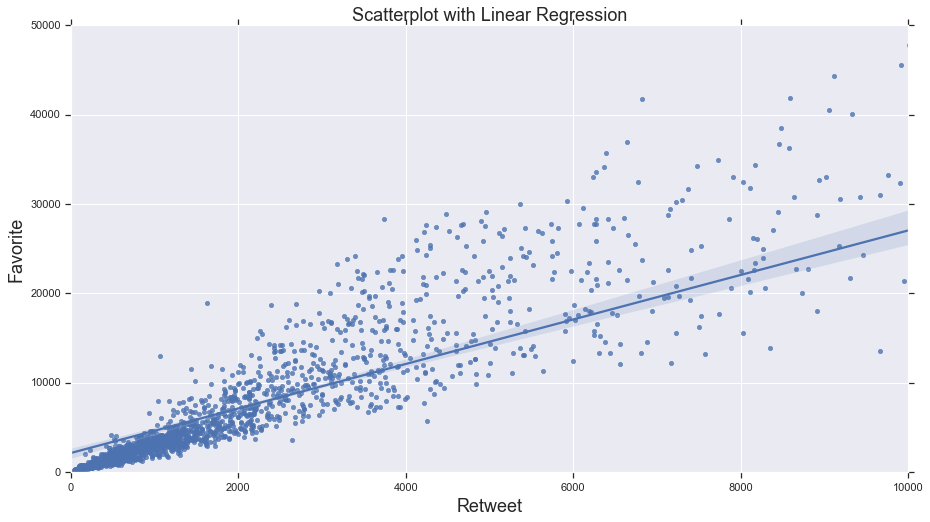

In [98]:
# Scatterplot of retweet and favorite count with the linear regression line

plt.figure(figsize=(15,8), frameon=False)

sns.regplot(x=rt, y=fav)

plt.xlim(0,10000)
plt.ylim(0,50000)

plt.xlabel("Retweet", fontsize=18)
plt.ylabel("Favorite", fontsize=18)
plt.title("Scatterplot with Linear Regression", fontsize=18)

plt.show()